A product recommendation is a suggestion for a product that a customer might
want to buy. Recommendation systems play a crucial role in shaping user
experiences across e-commerce platforms, streaming services, and online
marketplaces. These systems analyze user behavior, preferences, and
interactions to provide personalized suggestions.
The aim of this project is to build a model, applying five key unsupervised
learning techniques;

      1. Clustering - KMeans, DBSCAN, Tsne (Done by Harshita Puthran (B017 Nupur Divekar (B016))

      2. Topic Modelling - LDA, NMF (Done by Anjali Patwa (B010))

      3. Anomaly Analysis using Different Models (Done by Vinti Shukla (B026))

      4. Anomaly Detection using Different Models (Done by Vinti Shukla (B026))

     5. Recommendation System Using Graph Based and KMeans (Done by Yashika Tirkey (B008))


# **Importing Libraries**

In [ ]:
import nltk
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download the punkt_tab data for sentence tokenization


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


### Clustering
>clustering similar reviews/products



In [ ]:
dataset = pd.read_csv("/content/sample30.csv")
dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [ ]:
# Load dataset
df = pd.read_csv("/content/sample30.csv")

df.dropna(subset=['reviews_text', 'reviews_rating'], inplace=True)

# Text vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X_text = vectorizer.fit_transform(df['reviews_text'])

# Normalize numerical features
scaler = StandardScaler()
X_numeric = scaler.fit_transform(df[['reviews_rating']])

# Combine features
X = np.hstack((X_text.toarray(), X_numeric))


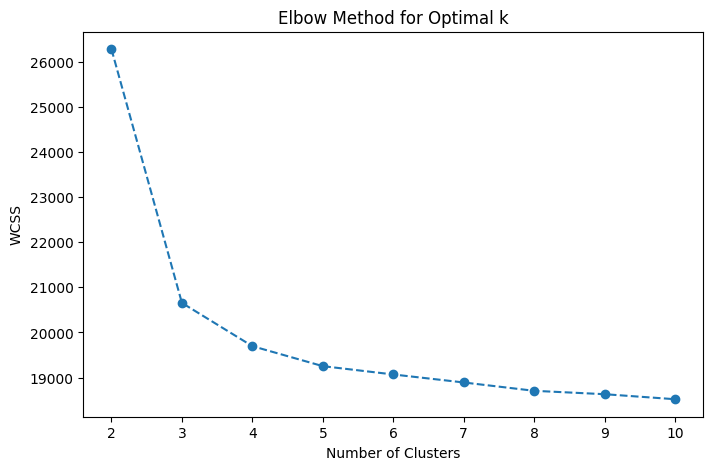

In [ ]:
# Elbow Method to Find Optimal Clusters
wcss = []
K_range = range(2, 11)  # Testing from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


By Elbow Method, we can know the Optimal Value is  K=3 , since k=3 not showing any significance result we tired with k=4

In [ ]:
# Choosing optimal clusters (e.g., based on the elbow method)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

df['Cluster'] = labels

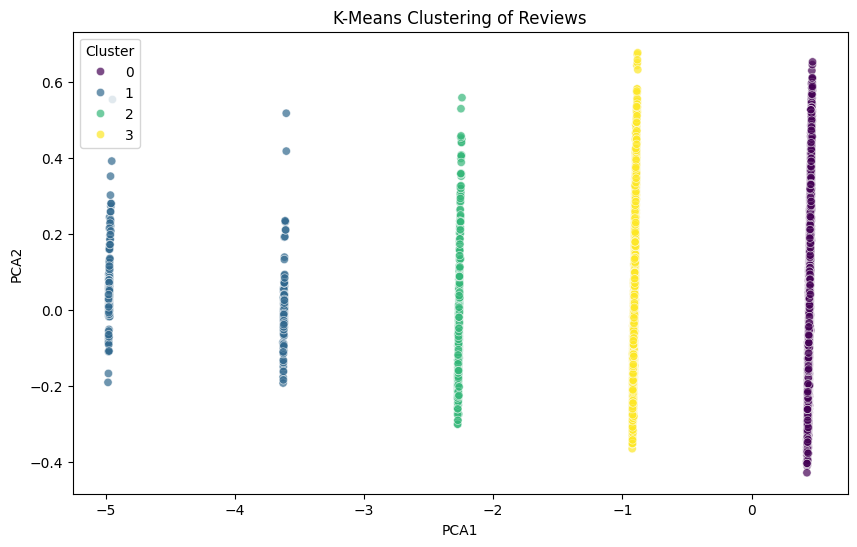

In [ ]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Visualizing Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("K-Means Clustering of Reviews")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

The clusters are well-separated, suggesting clear differences between groups.

However, the points are almost vertically aligned, which means that PCA1 carries most of the variance, while PCA2 does not contribute much to the differentiation.

This often happens when:

The dataset has high-dimensional features, and PCA struggles to capture meaningful variance in just 2 components.

The K-Means clustering is heavily influenced by the rating feature, possibly overpowering the text-based features.

In [ ]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.51504114 0.01838739]


his means:

PCA1 captures ~51.5% of the variance (good).

PCA2 captures only ~1.87% (very low).

Why This is a Problem
PCA1 is dominant, but PCA2 does not contribute much.

Together, they explain only ~53.4% of the variance, meaning almost 47% of the information is lost in 2D.

This suggests PCA(2D) is not a good choice for reducing your dataset.



In [ ]:
from sklearn.metrics import silhouette_score # Import the silhouette_score function

silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2911670653037465


>0.5 → Good clustering

0.2 - 0.5 → Weak clustering (try another k)

<0.2 → Clustering is bad, try another method (DBSCAN, Agglomerative)

In [ ]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)

[0.51504114 0.53342853]


If PCA2 is too low, try increasing n_components:

In [ ]:
pca = PCA(n_components=5)  # Increase components
X_pca = pca.fit_transform(X)

explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)


[0.51504114 0.53342853 0.54200854 0.54999834 0.55759184]


PCA is not reducing the dimensions effectively!

Typically, we aim for 90%+ variance in PCA to preserve most information.

Here, even 5 components capture only ~56%, meaning a lot of information is lost.

In [ ]:
##More PCA Components
pca = PCA(n_components=X.shape[1])  # Use all features
X_pca_full = pca.fit_transform(X)
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print(explained_variance)


[0.51504114 0.53342853 0.54200854 0.54999834 0.55759184 0.5640674
 0.57018255 0.57589065 0.58106274 0.58602932 0.59061149 0.59476892
 0.59880501 0.60262426 0.60635454 0.60997573 0.61343929 0.61682946
 0.62009942 0.6232221  0.62629948 0.62930996 0.63228279 0.63518449
 0.63805068 0.64084874 0.64359654 0.64630468 0.64900251 0.65163522
 0.65425294 0.65684809 0.65943006 0.66196895 0.66447989 0.6669532
 0.66937365 0.67178769 0.6741099  0.67640745 0.67866889 0.68088329
 0.68308066 0.68522533 0.68734095 0.6894288  0.69151096 0.69355829
 0.69559077 0.69760826 0.69961634 0.7015791  0.7035032  0.70540768
 0.70731181 0.709201   0.71106558 0.71284787 0.71460822 0.71634484
 0.71807404 0.71978206 0.72146055 0.72313279 0.72478347 0.72643245
 0.72806347 0.72968379 0.73127324 0.73285916 0.73441895 0.73597761
 0.73752293 0.73906521 0.74059528 0.74211146 0.74361911 0.74511478
 0.7466022  0.74807353 0.74951637 0.75095564 0.7523767  0.75378917
 0.75518631 0.75657973 0.7579693  0.7593396  0.76070815 0.762060

It looks like your PCA analysis isn't reaching a high explained variance even with all components included. The cumulative variance only reaches about 0.97 (97%) even after many components.

Key Insights:
First few components explain little variance: The first component explains ~51.5%, and adding more components increases it only gradually.

No sharp cutoff: Typically, we look for the number of components where variance > 95%. In your case, you may need a high number of components.

In [ ]:
pca_optimal = PCA(n_components=0.95)
X_pca_optimal = pca_optimal.fit_transform(X)
print(f"Number of components selected: {pca_optimal.n_components_}")


Number of components selected: 341


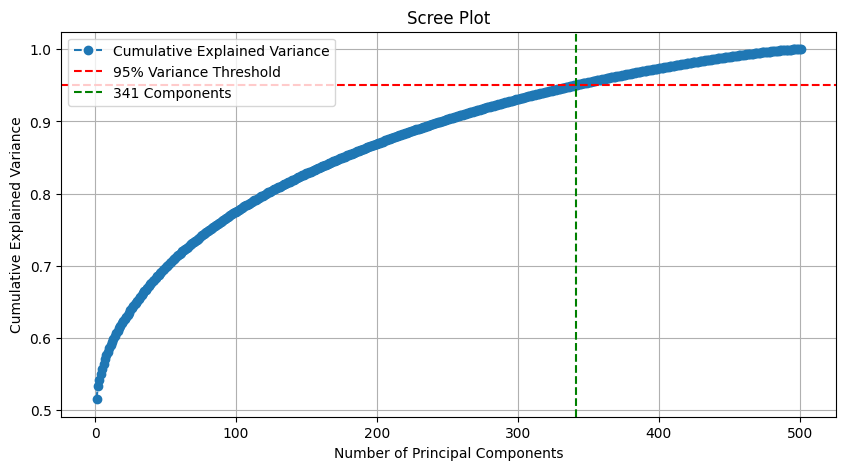

Number of components selected to retain 95% variance: 341


In [ ]:
pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Find first index where variance reaches 95%

# Plotting scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=num_components, color='g', linestyle='--', label=f'{num_components} Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.grid()
plt.show()

print(f"Number of components selected to retain 95% variance: {num_components}")

T-SNE for Better Visualization:

PCA might not always be the best for visualization;
t-SNE is more effective in visualizing non-linear structures in text data.



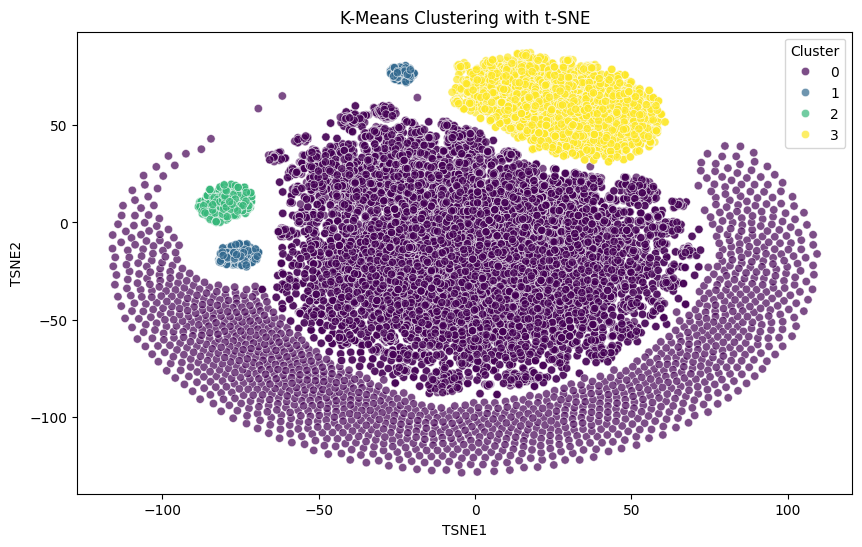

In [ ]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)
df['TSNE1'] = X_tsne[:, 0]
df['TSNE2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TSNE1'], y=df['TSNE2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title("K-Means Clustering with t-SNE")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.legend(title="Cluster")
plt.show()


"K-Means Clustering with t-SNE": This indicates that the plot shows the results of K-means clustering visualized using t-SNE (t-distributed Stochastic Neighbor Embedding), a technique often used for dimensionality reduction and visualization of high-dimensional data.


Cluster Separation: The plot shows how well-separated the clusters are; distinct groups can indicate that K-means clustering was effective in identifying patterns in the data.
Data Distribution: The overall shape and distribution of clusters can provide insights into the properties of the data itself (e.g., density, shape).
Outlier Identification: If certain points are isolated from the main clusters, they might be outliers or noise in the data.

Since your t-SNE visualization shows good clusters, you might want to replace PCA visualization with t-SNE visualization.

**Extract Top Keywords for Each Cluster**

In [ ]:
feature_names = vectorizer.get_feature_names_out()
cluster_keywords = {}

for cluster in range(optimal_k):
    indices = np.where(df['Cluster'] == cluster)[0]
    centroid = np.mean(X_text[indices], axis=0)
    # Convert the centroid to a dense NumPy array using .A1 if it's a sparse matrix
    centroid_array = centroid.toarray()[0] if hasattr(centroid, 'toarray') else centroid.A1

    # Now use centroid_array for further calculations
    top_words = [feature_names[i] for i in centroid_array.argsort()[-10:]]
    cluster_keywords[cluster] = top_words

# Print cluster insights
for cluster, words in cluster_keywords.items():
    print(f"Cluster {cluster}: {', '.join(words)}")

Cluster 0: clorox, clean, product, wipes, great, use, collected, promotion, review, love
Cluster 1: disappointed, movie, windex, just, bought, used, did, hair, like, product
Cluster 2: better, ok, use, great, just, product, funny, like, good, movie
Cluster 3: love, wipes, product, use, movie, good, great, promotion, collected, review


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Returns a score between -1 (negative) and +1 (positive)

df['Sentiment'] = df['reviews_text'].apply(get_sentiment)

# Average sentiment per cluster
sentiment_summary = df.groupby('Cluster')['Sentiment'].mean()
print(sentiment_summary)


Cluster
0    0.377615
1    0.047899
2    0.236625
3    0.332029
Name: Sentiment, dtype: float64


In [ ]:
print(df['Cluster'].value_counts())

Cluster
0    15915
3     3558
2      606
1      558
Name: count, dtype: int64


  Cluster 0 dominates (15,915 reviews) → Highly positive, associated with cleaning products.

  Cluster 1 is likely the most negative (lowest sentiment, only 558 reviews).

  Cluster 2 is neutral or mixed (lower sentiment, 606 reviews).

  Cluster 3 is positive but has fewer reviews (3,558) → May be a mix of cleaning and movie reviews.

# **Since Cluster 0 is too dominant, you might want to refine it: so we are using DBSCAN**


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.2, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)

df['DBSCAN_Cluster'] = dbscan_labels
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
0    20637
Name: count, dtype: int64


DBSCAN--> eps1.2 is giving only one clusters. so we have to finetune to find better eps which have significance cluster.

DBSCAN clustering result shows that all data points are assigned to a single cluster (0), which means that DBSCAN failed to detect meaningful structure in your dataset.



# **Fine Tune DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

for eps_val in [0.3, 0.4, 0.5, 0.6]:
    dbscan = DBSCAN(eps=eps_val, min_samples=10, metric='cosine')
    dbscan_labels = dbscan.fit_predict(X)

    print(f"\nDBSCAN Results for eps={eps_val}:")
    print(pd.Series(dbscan_labels).value_counts())



DBSCAN Results for eps=0.3:
-1     9798
 0     5629
 1     4687
 19      95
 13      83
 12      43
 4       41
 6       30
 2       27
 18      27
 16      24
 10      19
 14      18
 7       16
 21      11
 3       11
 8       11
 11      10
 22      10
 9       10
 20      10
 17      10
 5        9
 15       8
Name: count, dtype: int64

DBSCAN Results for eps=0.4:
 0    12735
 1     4722
-1     3105
 2       41
 3       26
 4        8
Name: count, dtype: int64

DBSCAN Results for eps=0.5:
 0    15678
 1     4722
-1      196
 2       41
Name: count, dtype: int64

DBSCAN Results for eps=0.6:
0    20637
Name: count, dtype: int64




Here, we can see that eps 0.5 giving better and significance cluster with noise



In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)
print(pd.Series(dbscan_labels).value_counts())
df['DBSCAN_Cluster'] = dbscan_labels

 0    15678
 1     4722
-1      196
 2       41
Name: count, dtype: int64


Now DBSCAN is detecting multiple clusters:

Cluster 0 → 15,678 points

Cluster 1 → 4,722 points

Cluster 2 → 41 points

Outliers (-1) → 196 points (Noise)

Analyze Cluster Characteristics
You can check what kind of reviews belong to each cluster:

In [ ]:
for cluster in sorted(df['DBSCAN_Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['DBSCAN_Cluster'] == cluster]['reviews_text'].sample(5, random_state=42))


Cluster -1:
17420    I have had about 3 years using this product an...
16392    I bought three of these online as I could not ...
1205                I noticed a change almost immediately.
6247     Opening Scene: The mundane daily routine of a ...
17808    I've always liked Axe's sprays. Now that they ...
Name: reviews_text, dtype: object

Cluster 0:
12265    I use Clorox wipes everyday to clean my home a...
9845     I use Clorox wipes to clean everything. It fee...
10750    I use them in both the bath and the kitchen an...
8436     I love these for every room in my house they a...
11528    Awesome product! I use and recommend Clorox Wi...
Name: reviews_text, dtype: object

Cluster 1:
7487     I like the convenience and disinfecting proper...
4721     I love all the movies from the first to the la...
2649     Nia was good, however the movie itself wasn't ...
15770    As a faithful user (and recommender) of the nu...
4141     Originally I reviewed this Hoover Vacuum in 11...
Name: revi

Cluster Breakdown
Cluster 0 (15,678 reviews) → Mostly cleaning products (Clorox wipes).

Cluster 1 (4,722 reviews) → Mix of cleaning products and movies.

Cluster 2 (41 reviews) → Very small cluster with food-related reviews.

Noise (-1, 196 reviews) → Highly unique/uncategorized reviews.

In [ ]:
print(df.groupby('DBSCAN_Cluster')['Sentiment'].mean())

DBSCAN_Cluster
-1    0.231753
 0    0.380286
 1    0.286210
 2    0.053643
Name: Sentiment, dtype: float64


0 (Clorox Wipes)	0.380 (Highly Positive)


1 (Mixed)	0.286 (Neutral-Positive)


2 (Food)	0.053 (Mostly Neutral)


-1 (Noise)	0.231 (Slightly Negative)





# **DBSCAN VS KMeans**

In [ ]:
print(pd.crosstab(df['DBSCAN_Cluster'], df['Cluster']))


Cluster             0    1    2     3
DBSCAN_Cluster                       
-1                196    0    0     0
 0              15678    0    0     0
 1                  0  558  606  3558
 2                 41    0    0     0


➡ Cluster 0 has the highest sentiment, meaning Clorox wipes are well-reviewed.

➡ Cluster 2 has the lowest sentiment, possibly indicating neutral/indifferent opinions.

DBSCAN Cluster 0 is almost the same as K-Means Cluster 0 (Clorox wipes).

DBSCAN Cluster 1 is a mix of K-Means Clusters 1, 2, and 3.

DBSCAN Cluster 2 is small and unique (food-related).

Noise (-1) consists of unique reviews that didn’t fit in other clusters.



In [ ]:
# DBSCAN clustering with eps=0.5 and cosine similarity
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='cosine')
dbscan_labels = dbscan.fit_predict(X)

# Store the cluster labels in the DataFrame
df['DBSCAN_Cluster'] = dbscan_labels

# Print cluster distribution
print(df['DBSCAN_Cluster'].value_counts())


DBSCAN_Cluster
 0    15678
 1     4722
-1      196
 2       41
Name: count, dtype: int64


In [ ]:
# Display some sample reviews from each cluster
for cluster in sorted(df['DBSCAN_Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df[df['DBSCAN_Cluster'] == cluster]['reviews_text'].sample(5, random_state=42))



Cluster -1:
17420    I have had about 3 years using this product an...
16392    I bought three of these online as I could not ...
1205                I noticed a change almost immediately.
6247     Opening Scene: The mundane daily routine of a ...
17808    I've always liked Axe's sprays. Now that they ...
Name: reviews_text, dtype: object

Cluster 0:
12265    I use Clorox wipes everyday to clean my home a...
9845     I use Clorox wipes to clean everything. It fee...
10750    I use them in both the bath and the kitchen an...
8436     I love these for every room in my house they a...
11528    Awesome product! I use and recommend Clorox Wi...
Name: reviews_text, dtype: object

Cluster 1:
7487     I like the convenience and disinfecting proper...
4721     I love all the movies from the first to the la...
2649     Nia was good, however the movie itself wasn't ...
15770    As a faithful user (and recommender) of the nu...
4141     Originally I reviewed this Hoover Vacuum in 11...
Name: revi

In [ ]:
# Assuming a 'Sentiment' column exists with values between 0 and 1
print(df.groupby('DBSCAN_Cluster')['Sentiment'].mean())


DBSCAN_Cluster
-1    0.231753
 0    0.380286
 1    0.286210
 2    0.053643
Name: Sentiment, dtype: float64


In [ ]:
# Assuming you previously clustered data using another method (e.g., K-Means or Agglomerative)
print(pd.crosstab(df['DBSCAN_Cluster'], df['Cluster']))


Cluster             0    1    2     3
DBSCAN_Cluster                       
-1                196    0    0     0
 0              15678    0    0     0
 1                  0  558  606  3558
 2                 41    0    0     0


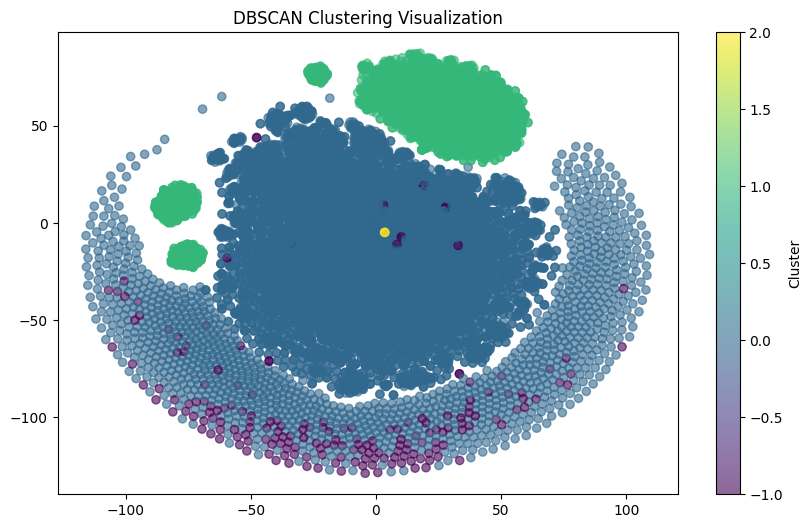

In [ ]:
# Reduce dimensions for visualization
tsne = TSNE(n_components=2, random_state=42)
X_2D = tsne.fit_transform(X)  # X is already a dense array

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.title('DBSCAN Clustering Visualization')
plt.show()

The image shows a significant number of distinct clusters, including:
A large central cluster (blue).
Smaller clusters (green) indicating outlier density.

2. Cluster Shape and Density

Non-Convex Shapes: DBSCAN excels at detecting non-convex clusters, as seen in the current distribution with varied shapes.
Density Variation: There is a clear variation in density; the central cluster is dense, while the edges show minor clusters or noise.

3. Noise Identification

Noise Points: Points indicated in lighter colors (such as pink) appear to be considered noise, which is a typical outcome of DBSCAN and suggests the algorithm is functioning correctly.

4. Visualization Interpretation

Color Gradient: The color gradient used effectively communicates different clusters and their densities, aiding in visual understanding.
Conclusion
The image reflects a suitable scenario for DBSCAN clustering:
Good for Implementation: Multiple clusters with complex shapes and noise identification make it conducive for DBSCAN's capabilities.

## **TOPIC MODELING**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sample30.csv")  # Load your dataset
df = df.dropna(subset=['reviews_text'])  # Remove missing values

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

df['clean_text'] = df['reviews_text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=5, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])


In [ ]:
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
nmf = NMF(n_components=5, random_state=42)
nmf.fit(tfidf_matrix)

NMF(n_components=5, random_state=42)

In [ ]:
def display_topics(model, feature_names, num_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"\nTopic {idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

print("LDA Topics:")
display_topics(lda, tfidf_vectorizer.get_feature_names_out())

print("\nNMF Topics:")
display_topics(nmf, tfidf_vectorizer.get_feature_names_out())

LDA Topics:

Topic 1:
lip color product formula new year old used like gel

Topic 2:
collected promotion review wipe use clean love clorox product easy

Topic 3:
hair product conditioner review skin promotion collected shampoo soft feel

Topic 4:
movie good great godzilla watch funny action loved better enjoyed

Topic 5:
great price season vacuum set flu cold evil easy movie

NMF Topics:

Topic 1:
promotion collected review product use easy clorox convenient cleaning disinfects

Topic 2:
movie good godzilla watch funny action enjoyed better loved family

Topic 3:
hair product conditioner like shampoo smell used feel using received

Topic 4:
great product work price smell cleaning use job taste recommend

Topic 5:
wipe clean love use clorox bathroom kitchen easy house disinfecting


LDA Topics Analysis
Topic 1 (Lipstick & Makeup): Focuses on beauty products, lip colors, and formula.

Topic 2 (Cleaning & Clorox): Talks about Clorox wipes, cleaning, and promotions.

Topic 3 (Hair & Skincare): Discusses hair conditioners, shampoo, skin care, and product feel.

Topic 4 (Movies & Entertainment): Covers movies, entertainment, and action films.

Topic 5 (Home & Appliances): Includes vacuums, seasonal flu, and home essentials.

✅ LDA captures broad themes with some mixed topics (e.g., flu + vacuum + movies in Topic 5).



NMF Topics Analysis
Topic 1 (Cleaning & Clorox): Talks about Clorox, cleaning, and disinfecting.

Topic 2 (Movies & Entertainment): Focuses entirely on movies, action, and family entertainment.

Topic 3 (Haircare & Shampoo): Covers hair products, conditioners, and how they feel.

Topic 4 (General Product Reviews & Cleaning): Discusses product effectiveness, price, and taste.

Topic 5 (Household Cleaning & Wipes): Focuses specifically on wipes, kitchen, bathroom, and disinfecting.

✅ NMF produces sharper, more distinct topics, making it better for structured analysis.

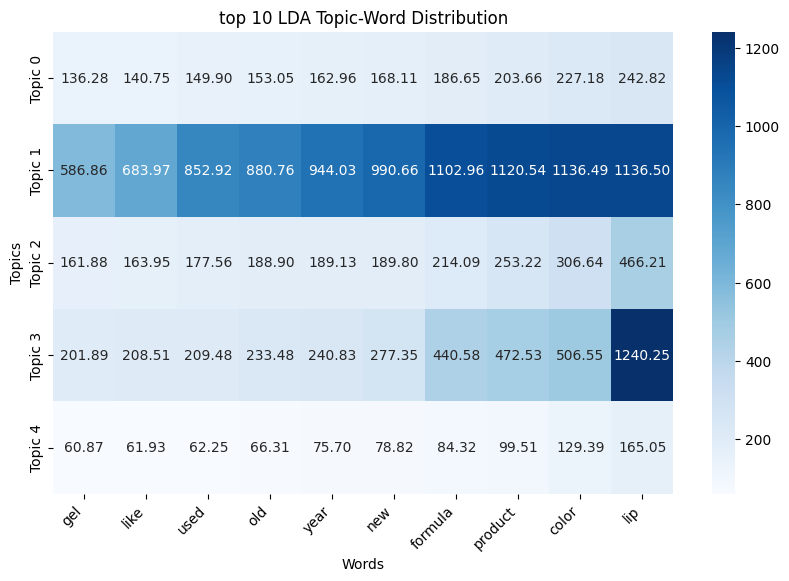

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select top 10 words for each topic
num_words = 10
top_words_indices = np.argsort(lda.components_, axis=1)[:, -num_words:]  # Get indices of top words

# Extract words from TF-IDF vectorizer
words = np.array(tfidf_vectorizer.get_feature_names_out())

# Create a heatmap data matrix with only top words
top_words = words[top_words_indices]
heatmap_data = np.array([lda.components_[i, top_words_indices[i]] for i in range(len(topics))])

plt.figure(figsize=(10, 6))  # Adjust figure size
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".2f", xticklabels=top_words[0], yticklabels=[f"Topic {i}" for i in range(len(topics))])

plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.xlabel("Words")
plt.ylabel("Topics")
plt.title("top 10 LDA Topic-Word Distribution")
plt.show()


In [ ]:
def plot_word_cloud(model, feature_names, title):
    fig, axes = plt.subplots(1, 5, figsize=(20, 10))
    for i, topic in enumerate(model.components_):
        # Ensure indices are within the bounds of feature_names
        word_indices = topic.argsort()[:-15 - 1:-1]
        valid_indices = [idx for idx in word_indices if 0 <= idx < len(feature_names)]

        wordcloud = WordCloud(width=400, height=400, background_color='white').generate(
            " ".join([feature_names[j] for j in valid_indices]) # Use valid indices
        )
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f"{title} {i+1}")
    plt.show()

# Plot Word Clouds
feature_names = tfidf_vectorizer.get_feature_names_out() # Get feature names from tfidf_vectorizer


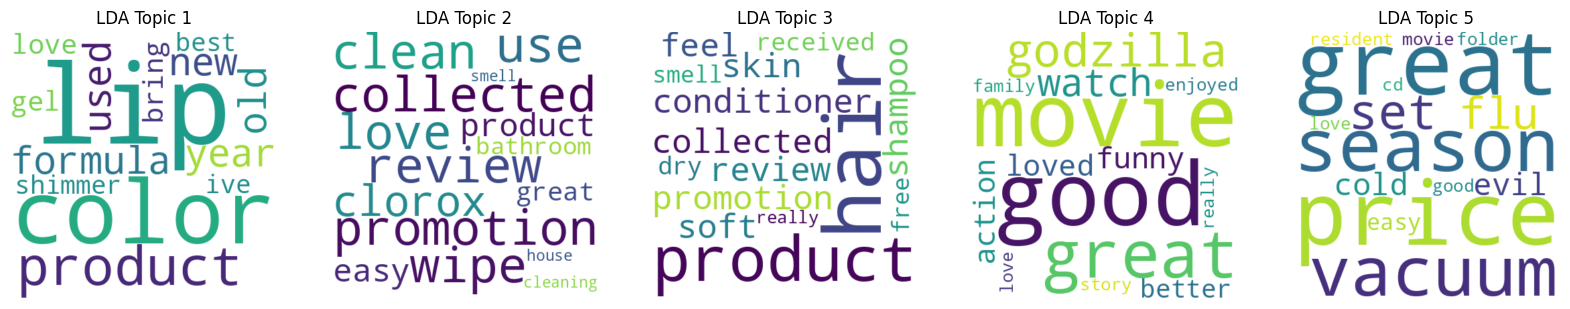

In [ ]:
plot_word_cloud(lda, feature_names, "LDA Topic")


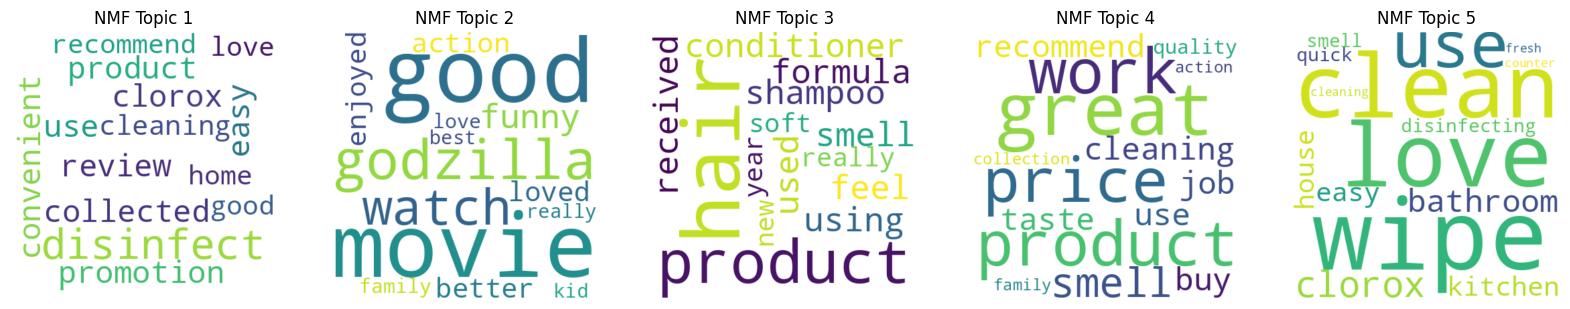

In [ ]:
plot_word_cloud(nmf, feature_names, "NMF Topic")

## **Anomaly Detection**

Here's the implementation for anomaly detection using Isolation Forest and One-Class SVM to identify potential fake or rare reviews. This includes:

    ✅ Extracting features (review length, sentiment score, repeated words).
    ✅ Training** Isolation Forest & One-Class SVM.**
    ✅ Flagging outliers for further analysis.
    ✅DBSCAAN

Potential Fake Reviews:
                                            reviews_text  reviews_rating
3      I read through the reviews on here before look...               1
12     Bought this to enhance our time a bit, did abs...               1
20     I noticed this product on clearance at a store...               4
30     yes, the scent is the best. if you like lemon ...               5
32     Smells like a lemon cookie. Absolutely love!!!...               5
...                                                  ...             ...
29945  I love conditioners! And this is soooo good! I...               5
29976  I received this product free through Influenst...               5
29984  Just add a face mask and you are basically tre...               5
29988  I received this product for free to try and I ...               5
29991  Took the 48 hour hair challenge using the sham...               5

[3385 rows x 2 columns]


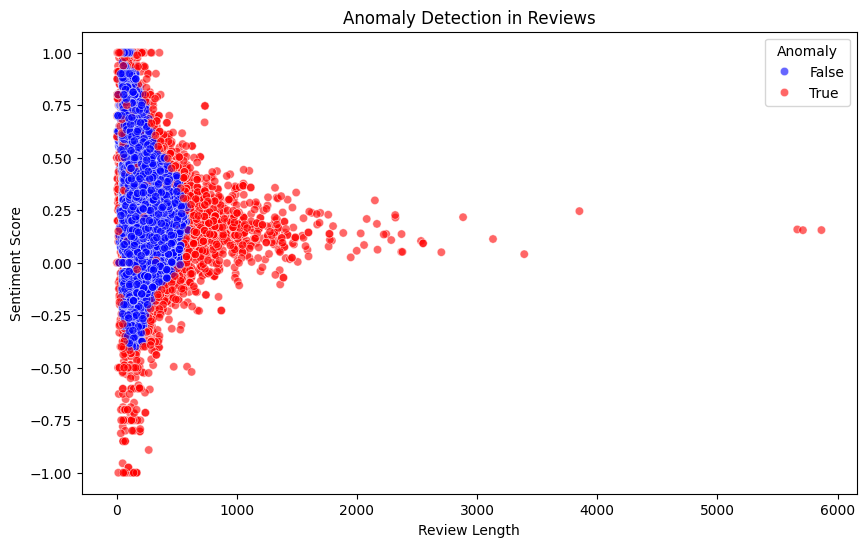

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from textblob import TextBlob


# Anomaly Detection - Extract Features
df['review_length'] = df['reviews_text'].apply(len)
df['sentiment'] = df['reviews_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['reviews_text'].apply(lambda x: len(x.split()))

# Normalize features
feature_cols = ['review_length', 'sentiment', 'word_count']
X_anomaly = scaler.fit_transform(df[feature_cols])

# Isolation Forest Model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['iso_forest_anomaly'] = iso_forest.fit_predict(X_anomaly)

# One-Class SVM Model
svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
df['svm_anomaly'] = svm.fit_predict(X_anomaly)

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['lof_anomaly'] = lof.fit_predict(X_anomaly)

# DBSCAN Clustering for Anomaly Detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_anomaly'] = dbscan.fit_predict(X_anomaly)

# Flag outliers
df['anomaly'] = (df['iso_forest_anomaly'] == -1) | (df['svm_anomaly'] == -1) | (df['lof_anomaly'] == -1) | (df['dbscan_anomaly'] == -1)
print("Potential Fake Reviews:")
print(df[df['anomaly'] == True][['reviews_text', 'reviews_rating']])


# Visualizing Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['review_length'], y=df['sentiment'], hue=df['anomaly'], palette={True: 'red', False: 'blue'}, alpha=0.6)
plt.title("Anomaly Detection in Reviews")
plt.xlabel("Review Length")
plt.ylabel("Sentiment Score")
plt.legend(title="Anomaly")
plt.show()


The scatter plot visualizes the relationship between review length (x-axis) and sentiment score (y-axis).
It categorizes reviews into two groups: anomalies (red circles) and non-anomalies (blue circles).
Axis Descriptions

X-Axis: Review Length

Ranges from 0 to 6000 characters.
Represents the number of characters in individual reviews.
Y-Axis: Sentiment Score

Ranges from -1.0 to 1.0.
Indicates the sentiment expressed in the reviews, with -1 being very negative, 0 being neutral, and 1 being very positive.
Data Points

Blue Circles (Anomaly = False):Predominantly cluster in the higher sentiment range (0 to 1) and predominantly with shorter reviews (up to about 1000 characters).
Suggests that typical reviews tend to be positive, particularly those that are shorter.


Red Circles (Anomaly = True):Positioned throughout the sentiment range, with some extreme values showing negative sentiment, including several reviews with low sentiment scores (below 0).
Disperse beyond the lengths of the blue points, indicating that longer reviews can also present negative sentiments.
Key Insights

Sentiment Distribution: The blue dots demonstrate that typical (non-anomalous) reviews are often concise and more positive.


Anomalous Reviews: Red points suggest that reviews classified as anomalies often have varied lengths and negative sentiment. This could indicate that overly negative reviews or reviews that deviate significantly from the norm are considered anomalies.


Potential Implications:Businesses can utilize this information for identifying problematic reviews or genuine customer concerns.
Short, positive reviews may indicate customer satisfaction, while long, negative reviews might require further investigation.


Conclusion:  The scatter plot serves as a valuable tool for visualizing sentiment in customer reviews and identifying outlier reviews for further analysis. Understanding these patterns can help businesses address customer concerns and enhance service or product offerings.

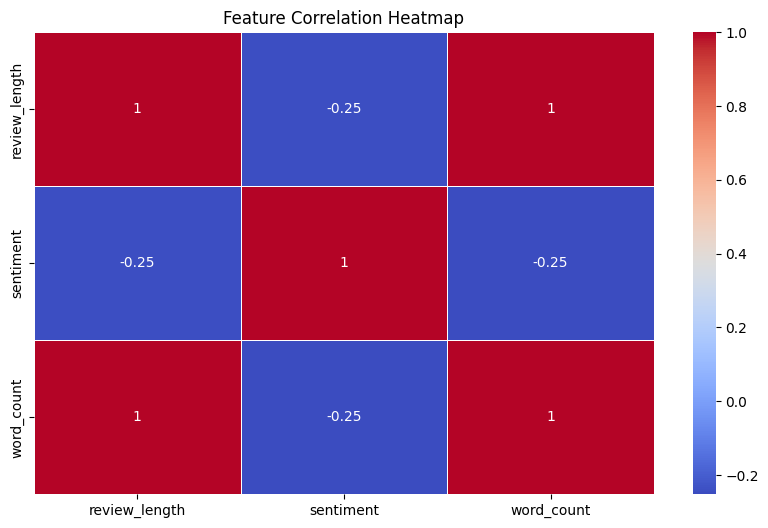

In [ ]:
# Heatmap of Anomalies
plt.figure(figsize=(10, 6))
sns.heatmap(df[feature_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Diagonal Elements: The diagonal (self-correlation) shows a perfect correlation of 1 for each variable with itself.

Correlation between Features:

review_length and sentiment:
  Correlation: -0.25
  Interpretation: There is a weak negative correlation. As the length of reviews increases, sentiment may slightly decrease, or vice versa, but the relationship is weak.


review_length and word_count:
  Correlation: 1
  Interpretation: A perfect positive correlation. This indicates that longer reviews inherently contain more words, suggesting that these two features are directly proportional.


sentiment and word_count:
  Correlation: -0.25
  Interpretation: Similar to the review_length correlation with sentiment, there is a weak negative correlation. Longer word counts in reviews may slightly correlate with lower sentiment ratings.

The heatmap color gradient ranges from red to blue:
Red indicates positive correlations (1).
Blue indicates negative correlations (0 to -1).
The intensity of the colors signifies the strength of the correlation.

Conclusion

The heatmap reveals that while review_length and word_count are perfectly correlated, the sentiment feature has weak negative correlations with both. This suggests that while longer reviews tend to contain more words, longer reviews may result in slightly lower sentiment ratings.

<ipython-input-74-38b05ca25ee6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['anomaly'], palette='viridis')


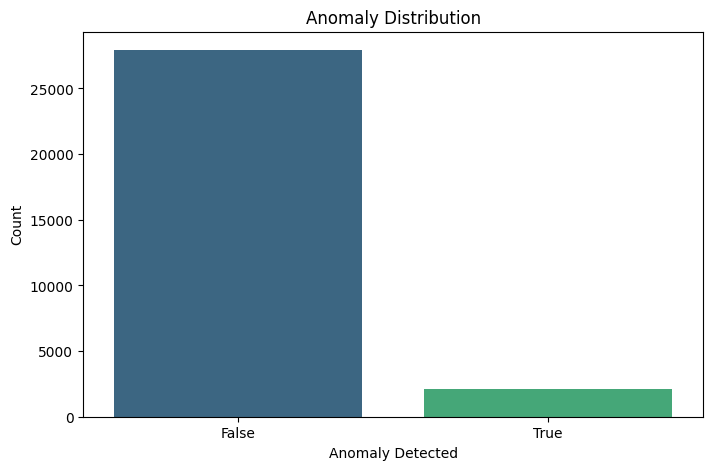

In [ ]:
# Clustering Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['anomaly'], palette='viridis')
plt.title("Anomaly Distribution")
plt.xlabel("Anomaly Detected")
plt.ylabel("Count")
plt.show()


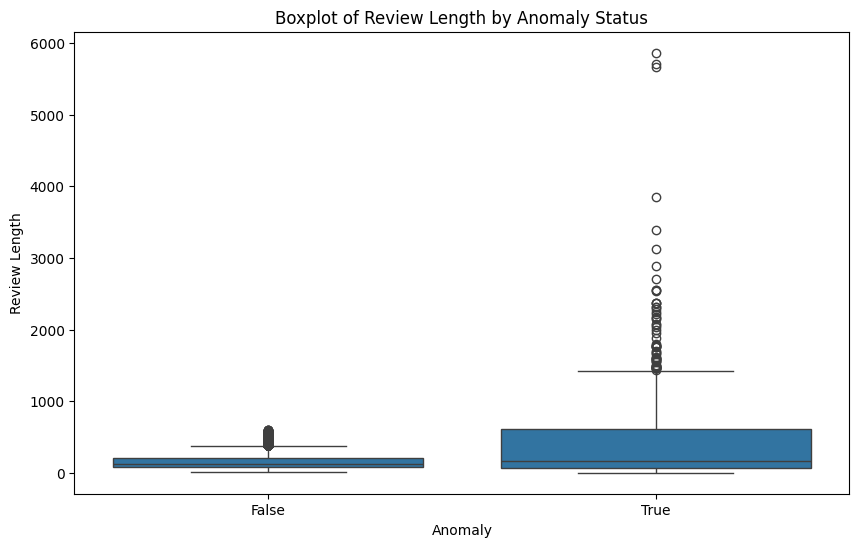

<ipython-input-78-a8f602ee12d3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='anomaly', y='sentiment', palette="muted")


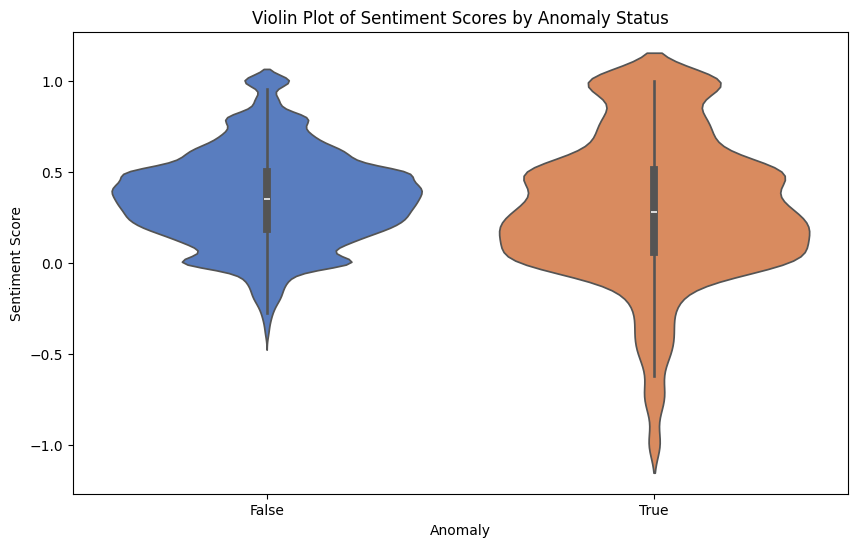

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='anomaly', y='review_length')
plt.title("Boxplot of Review Length by Anomaly Status")
plt.xlabel("Anomaly")
plt.ylabel("Review Length")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='anomaly', y='sentiment', palette="muted")
plt.title("Violin Plot of Sentiment Scores by Anomaly Status")
plt.xlabel("Anomaly")
plt.ylabel("Sentiment Score")
plt.show()


## **Kmeans Sentiment Clustering of Anomalous Reviews**

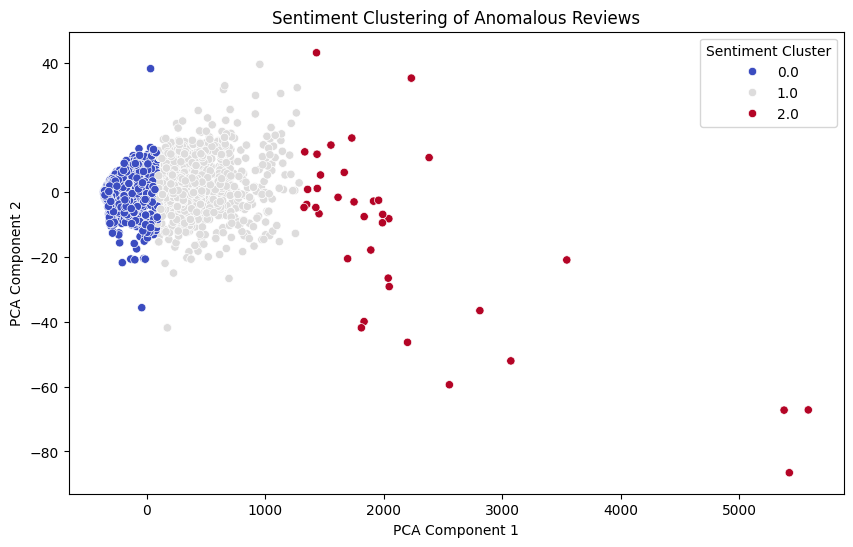

In [ ]:
anomalous_reviews = df[df['anomaly'] == True][feature_cols]
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[df['anomaly'] == True, 'sentiment_cluster'] = kmeans.fit_predict(anomalous_reviews)

# Visualizing Sentiment Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(anomalous_reviews)
df.loc[df['anomaly'] == True, 'pca1'] = pca_result[:, 0]
df.loc[df['anomaly'] == True, 'pca2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['anomaly'] == True], x='pca1', y='pca2', hue='sentiment_cluster', palette='coolwarm')
plt.title("Sentiment Clustering of Anomalous Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Sentiment Cluster")
plt.show()

The blue cluster (0) is tightly packed, suggesting similar sentiment patterns among those reviews.

The gray cluster (1) is the largest and forms a central distribution, likely representing normal or neutral reviews.

The red cluster (2) is widely spread, indicating anomalous reviews that differ significantly from the rest. These could be:

    Fake reviews

    Highly polarizing opinions (extremely positive or negative)

    Reviews generated by bots

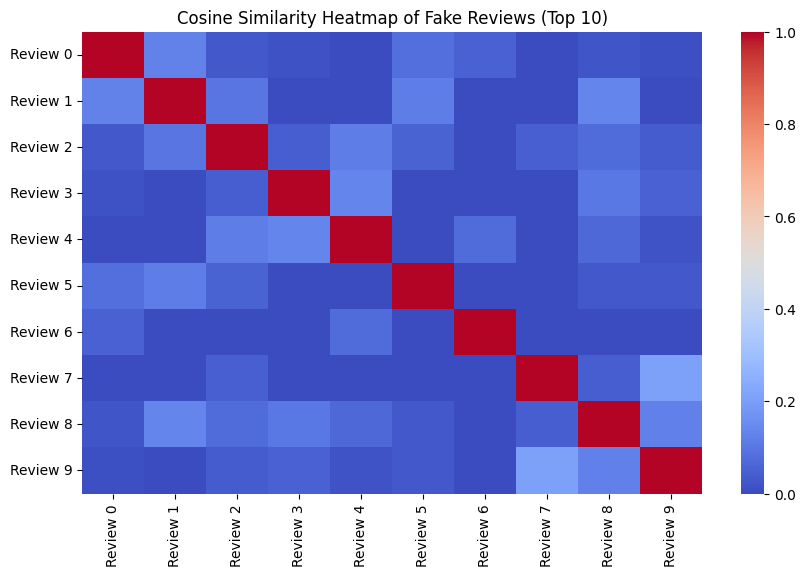

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute Cosine Similarity for Fake Reviews
fake_reviews = df[df['anomaly'] == True]['reviews_text']

# Select only the first 10 fake reviews
fake_reviews_sample = fake_reviews.iloc[:10]
tfidf_matrix = vectorizer.fit_transform(fake_reviews_sample)
cosine_sim = cosine_similarity(tfidf_matrix)

# Convert to DataFrame for labeling
review_labels = [f"Review {i}" for i in range(len(fake_reviews_sample))]

# Plot Heatmap with Labels
plt.figure(figsize=(10, 6))
sns.heatmap(cosine_sim, cmap='coolwarm', xticklabels=review_labels, yticklabels=review_labels, annot=False)
plt.title("Cosine Similarity Heatmap of Fake Reviews (Top 10)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



Clusters of similar reviews: Some reviews are very similar, which may indicate fake reviews written by the same person/bot.

Low similarity in general: If most regions are dark blue, it suggests that the fake reviews were written with enough variation to avoid detection.

Suspicious patterns: If multiple reviews share high similarity across different pairs, it could indicate automated fake review generation.

Detecting Fake Reviews: Reviews with high similarity could be flagged for further investigation.

Pattern Analysis: If fake reviews follow a specific template, algorithms can be trained to identify them.

Improving Fake Review Detection Models: This visualization can help refine text-based anomaly detection systems.

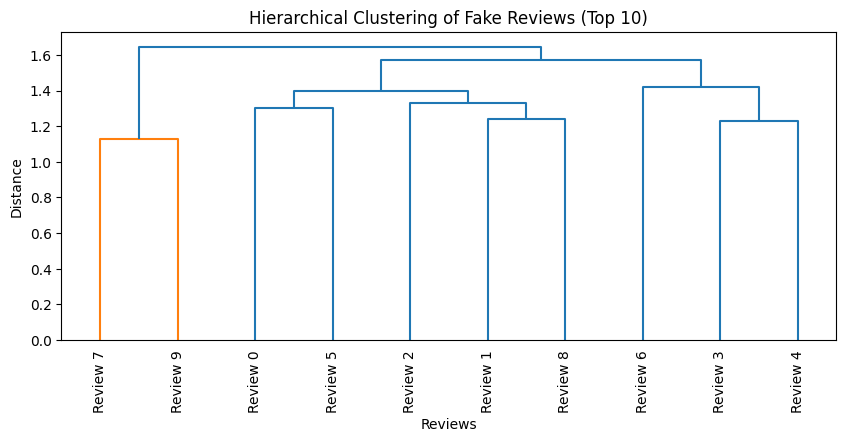

In [ ]:
# Hierarchical Clustering Dendrogram
plt.figure(figsize=(10, 4))
linkage_matrix = linkage(1 - cosine_sim, method='ward')
dendrogram(linkage_matrix, labels=review_labels, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering of Fake Reviews (Top 10)")
plt.xlabel("Reviews")
plt.ylabel("Distance")
plt.show()


Closest Pair:  Review 7 and Review 9 are the most similar, forming the first cluster (orange line).

Major Groupings: Review pairs progressively merge into larger groups.

Reviews 0 and 5, Reviews 2 and 1, Reviews 3 and 4, and Review 6 form separate subgroups before merging.

Largest Distance: The final merge occurs at a high distance (~1.6), indicating that the last clusters are quite different.